## High and Low Pass Filters

To understand what makes a Sobel Filter a High-Pass Filter and a Gaussian Filter a Low-Pass Filter, we are going to visualize the frequencies that these filters are going to block out by taking their **Fourier Transform**. An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum.

### Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

### Defining the Filters

In [2]:
# Defining the Gaussian Filter
gaussian = (1/16)*np.array([[1, 2, 1],
                           [2, 4, 2],
                           [1, 2, 1]])

# Defining the Sobel Filter
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# Defining the Laplacian (Edge) Filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['Gaussian','Sobel_x', 
                'Sobel_y', 'Laplacian']

### Taking Fast Fourier Transform

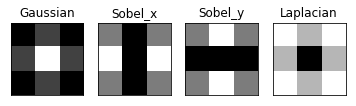

In [3]:
# Creating a scaled frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
f_shift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in f_shift]

# Displaying the Filters
for i in range(len(filters)):
    plt.subplot(1,4,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

Areas of white or light gray, allow that part of the frequency spectrum through! Areas of black mean that part of the spectrum is blocked out of the image. 

Low frequencies in the frequency spectrum are at the center of the frequency transform image, and high frequencies are at the edges. 

A Gaussian filter allows only low-pass frequencies through. The sobel filters block out frequencies of a certain orientation and a laplace (detects edges regardless of orientation) filter, should block out low-frequencies!

### Applying FFT to an Image

In [4]:
# Reading in the image
image = cv2.imread('images/city_hall.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Applying the Filters
filtered_image = []
for i in range(len(filters)):
    filtered = cv2.filter2D(gray, -1, filters[i])
    filtered_image.append(filtered)

# Creating a scaled frequency transform image
f_filtered = [np.fft.fft2(x) for x in filtered_image]
f_filtered_shift = [np.fft.fftshift(y) for y in f_filtered]
f_filtered_images = [np.log(np.abs(z)+1) for z in f_filtered_shift]

### Displaying the Images

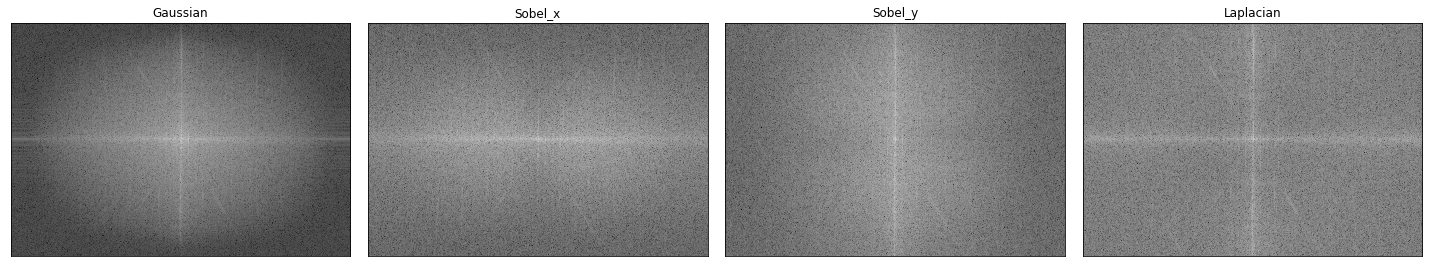

In [5]:
plt.figure(figsize = (20,10));

for i in range(len(filters)):
    plt.subplot(1,4,i+1),plt.imshow(f_filtered_images[i],cmap = 'gray');
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([]);

plt.tight_layout();